# Submitted by: Reham Essam ELTagoury
# group: 5

# GMM Implementation



I used dataset 7 from the previous lab to test my code

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns

In [251]:
dataset7= pd.read_csv("/content/dataset7.csv")

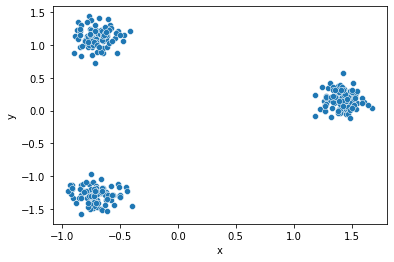

In [252]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()
dataset7[["x","y"]] = z.fit_transform(dataset7)
X=dataset7[['x','y']]
sns.scatterplot(x='x',y='y',data=dataset7)

In [253]:
X=X.to_numpy()

In [254]:
len(X)

299

In [255]:
def multivariate_normal(X, mean, cov):
  return (1/np.linalg.det(2*np.pi*cov)**0.5)*np.exp(-0.5*np.dot(np.dot((X-mean).T, np.linalg.inv(cov)), (X-mean)))

In [256]:
def resposibility(X,n_cluster,pi,mean_vector,cov):

  res=np.zeros((len(X),n_cluster)) # matrix of length of data x number of clusters
  # res.shape
  # Calculating the r matrix
  for n in range(len(X)):
    for k in range(n_cluster):
          # print(k)
          res[n][k] = pi[k] * multivariate_normal(X[n], mean_vector[k], cov[k])
          res[n][k] /= sum([pi[j]*multivariate_normal(X[n], mean_vector[j], cov[j]) for j in range(n_cluster)])
  return res

In [257]:
def predict(X,mean_vector,n_cluster,cov):
  probas = []
  for n in range(len(X)):
      probas.append([multivariate_normal(X[n], mean_vector[k], cov[k])
                      for k in range(n_cluster)])
  cluster = []
  for proba in probas:
      # print(proba)
      cluster.append(proba.index(max(proba)))
  return cluster

In [258]:
n_cluster=3
max_iter=5
new_X = np.array_split(X, n_cluster)
# step 1: initialize mean and variance and pi
mean_vector = [np.mean(x, axis=0) for x in new_X]
cov = [np.cov(x.T) for x in new_X]
pi = [1/n_cluster for comp in range(n_cluster)]
for i in range(max_iter): # iterate until convergence
      # step 2: calculate the responsibility of each point E step
      res=resposibility(X,n_cluster,pi,mean_vector,cov)
      N = np.sum(res, axis=0)
      # step 3: M algorithm
      mean_vector = np.zeros((n_cluster, len(X[0])))
      # updating the mean 
      for k in range(n_cluster):
            for n in range(len(X)):
                mean_vector[k] += res[n][k] * X[n] # responsibilty * mean
      mean_vector = [1/N[k]*mean_vector[k] for k in range(n_cluster)]
      # updating the covariance
      for k in range(n_cluster):
        cov[k] = np.cov(X.T, aweights=(res[:, k]), ddof=0)
      cov=[1/N[k]*cov[k] for k in range(n_cluster)]
      # update the pi
      pi = [N[k]/len(X) for k in range(n_cluster)]








In [259]:
C=predict(X,mean_vector,n_cluster,cov)

In [260]:
# C

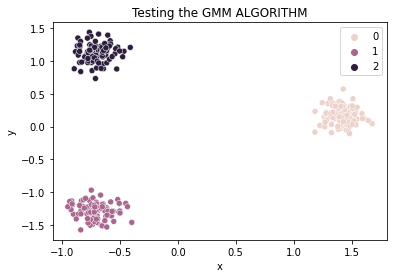

In [261]:

sns.scatterplot(x='x',y='y',data=dataset7,hue=C).set_title("Testing the GMM ALGORITHM");